#<font color='magenta'>Aprendizaje de Dígitos </font>
**Ángela Burgaleta Ledesma
CDAW Feb/2022**

El objetivo de esta práctica es aprender con el dataset de digits del Scikit-learn:

* Los pasos básicos para aplicar ML (análisis de datasets, cargado, preprocesado, entrenamiento, validación, optimización y persistencia)
* Explorar el dataset
* Visualizar el dataset
* Aprender a cargar un bundle dataset
* Separar el conjunto de datos en conjuntos de datos de prueba y de entrenamiento
* Entrenar un clasificador
* Predecir con un clasificador entrenado
* Evaluar las predicciones
* Optimizar la configuración del clasificador
* Salvar el modelo



##<font color='purple'>Leer el dataset</font>

El dataset de dígitos se utiliza para clasificación. En este apartado exploramos los datos que tenemos para entender la información que nos aporta este conjunto de datos. 

Cada dígito (números del 0 al 9) está formado por 8x8 píxeles en el rango de 0 a 16. Con este conjunto de datos se intenta que el programa sea capaz de distinguir (clasificar) si un número es un 0, 1, 2, 3... 



In [ ]:
#PASOS PREVIOS
# importar datasets de scikit-learn, cargar y mirar el tamaño 
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)





(1797, 64)


In [ ]:
#El tipo es bunch (subtipo de diccionario)
type(digits)

sklearn.utils.Bunch

In [ ]:
#Obtenemos la descripción 
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
#Nombre de los atributos del dataset (son píxeles)
#tenemos una matriz de 8x8 píxeles para cada dígito
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [ ]:
#Los atributos target. Son 10 clases (del número 0 al 9). 
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
type(digits.data)

numpy.ndarray

In [ ]:
#INSPECCIONAMOS

print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
print(digits.target)

print(digits.data.shape)

print(digits.data.ndim) #dimension 2

print(digits.data.shape[0]) #1797 filas/muestras

print(digits.data.shape[1]) #64 columnas



[0 1 2 ... 8 9 8]
(1797, 64)
2
1797
64


##<font color='purple'>Visualización y Exploración de los datos</font>

El objetivo de este aparado es aprender a cómo analizar el dataset. Aquí se cubren tareas como **limpiar y cambiar el formato** de los datos

In [ ]:
#matplotlib para realizar las gráficas
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame


In [ ]:
#nos muestra un array muy largo
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
#nos muestra las clases en las que queremos clasificar los píxeles (0 ,1, 2, 3, 4, 5, 6, 7, 8, 9)
print(digits.target)

[0 1 2 ... 8 9 8]


In [ ]:
#vemos como se representaría el dígito 0 
print("Dígito 0:\n", digits.images[0])
print("\n")
#vemos como se representaría el dígito 8
print("Dígito 8: \n", digits.images[8])

Dígito 0:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Dígito 8: 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.]
 [ 0.  0. 12. 14. 14. 12.  0.  0.]
 [ 0.  0.  9. 10.  0. 15.  4.  0.]
 [ 0.  0.  3. 16. 12. 14.  2.  0.]
 [ 0.  0.  4. 16. 16.  2.  0.  0.]
 [ 0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  1. 15.  1.  3. 16.  8.  0.]
 [ 0.  0. 11. 16. 15. 11.  1.  0.]]


En Machine Learning vamos a querer transformar los datos siempre a números. Si pueden ser 0 y 1 mejor, si pueden ser datos positivos todavía mejor. Esto nos facilita la tarea de normalizar los datos.

In [ ]:
#Visualizar los datos en estructura de dataframe
#Podemos ver el índice (del 0 al 1796) a la izquierda y a la derecha el dígito que representa cada ristra de píxeles
digits_df = DataFrame(digits.data)
digits_df.columns = digits.feature_names

digits_df['species'] = digits.target

#mostramos las 20 primeras filas
digits_df.head(20)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,species
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,14.0,0.0,0.0,0.0,0.0,13.0,16.0,15.0,10.0,1.0,0.0,0.0,0.0,11.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,9.0,0.0,0.0,0.0,5.0,4.0,12.0,16.0,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,13.0,16.0,3.0,0.0,0.0,0.0,0.0,0.0,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,12.0,7.0,2.0,0.0,0.0,0.0,0.0,13.0,16.0,13.0,16.0,3.0,0.0,0.0,0.0,7.0,16.0,11.0,15.0,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,7.0,7.0,4.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,1.0,0.0,0.0,4.0,8.0,8.0,15.0,15.0,6.0,0.0,0.0,2.0,11.0,15.0,15.0,4.0,0.0,0.0,0.0,0.0,0.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,12.0,14.0,14.0,12.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,15.0,4.0,0.0,0.0,0.0,3.0,16.0,12.0,14.0,2.0,0.0,0.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,3.0,16.0,8.0,10.0,13.0,2.0,0.0,0.0,1.0,15.0,1.0,3.0,16.0,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,16.0,16.0,13.0,0.0,0.0,0.0,3.0,16.0,12.0,10.0,14.0,0.0,0.0,0.0,1.0,16.0,1.0,12.0,15.0,0.0,0.0,0.0,0.0,13.0,16.0,9.0,15.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


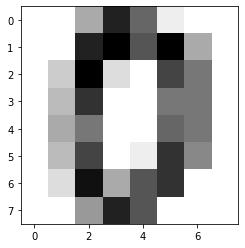

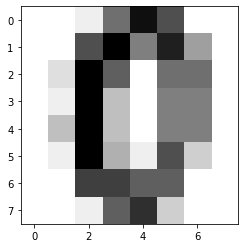

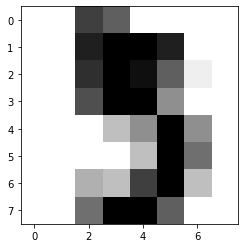

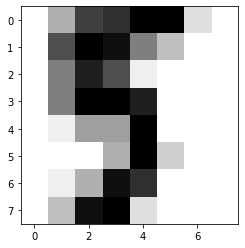

In [ ]:
#Podemos probar a mostrar como se verían algunos dígitos

#La fila 0 y la 10 representan el 0. 
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
plt.imshow(digits.images[10], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()


#La fila 5 y la 15 muestran el 5 (o eso creo)
plt.imshow(digits.images[5], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
plt.imshow(digits.images[15], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()




##<font color='purple'>Preprocesado de los datos</font>

Vamos a dividir los datos en dos grupos. El **training set** y el **test set**. Utilizamos el 75% del dataset para el entrenamiento y el 25% para el testing. Random_state nos asegura que el resultado siempre es el mismo y es reproducible, de otra manera tendríamos distintos entrenamientos y testeo cada vez.


In [ ]:
from sklearn.model_selection import train_test_split

x_digits, y_digits = digits.data, digits.target
# 25% para testing
x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits, test_size=0.25, random_state=33)

In [ ]:
#Dimensiones 
print(x_train.shape, x_test.shape)

(1347, 64) (450, 64)


In [ ]:
print(y_train.shape, y_test.shape)

(1347,) (450,)


In [ ]:
#Test set
print (x_test)

[[ 0.  0.  4. ... 11.  0.  0.]
 [ 0.  0.  3. ... 16. 10.  0.]
 [ 0.  0.  7. ...  0.  0.  0.]
 ...
 [ 0.  0.  6. ... 12.  1.  0.]
 [ 0.  0.  0. ... 11.  1.  0.]
 [ 0.  0.  0. ... 16. 11.  0.]]


In [ ]:
#Train set
print (x_train)

[[ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0. 12. ...  0.  0.  0.]
 [ 0.  1.  7. ...  0.  0.  0.]]


In [ ]:
#NORMALIZACIÓN

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Podemos ver los datos normalizados
print(x_test)

[[ 0.         -0.32672314 -0.2423893  ...  0.73926354 -0.49709493
  -0.19054741]
 [ 0.         -0.32672314 -0.4534419  ...  1.58229435  1.97553015
  -0.19054741]
 [ 0.         -0.32672314  0.39076852 ... -1.11540424 -0.49709493
  -0.19054741]
 ...
 [ 0.         -0.32672314  0.17971592 ...  0.90786971 -0.24983242
  -0.19054741]
 [ 0.         -0.32672314 -1.08659972 ...  0.73926354 -0.24983242
  -0.19054741]
 [ 0.         -0.32672314 -1.08659972 ...  1.58229435  2.22279266
  -0.19054741]]


##<font color='purple'>Algoritmos de CLASIFICACIÓN</font>

###Algoritmo K-NN

El método k-nearest neighbors es un método de clasificación supervisada que estima el valor de la función de densidad de probabilidad o directamente la probabilidad a posteriori de un elemento pertenezca a una clase. 

La función se aproxima solo localmente mediante ejemplos cercanos en el espacio de los elementos. 



In [ ]:
#KNN MODEL
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Create kNN model
model = KNeighborsClassifier(n_neighbors=15)

# Train the model using the training sets
model.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=15)

In [ ]:
print("Prediction ", model.predict(x_train))
print("Expected ", y_train)
#Parece que hace buenas predicciones


Prediction  [4 7 4 ... 1 5 5]
Expected  [4 7 4 ... 1 5 5]


**Evaluación del algoritmo**

*Precisión*: proporción de elementos predecidos como positivos que son evaluados correctamente (TP/FP+TP)

*Recall*: cantidad de positivos que el modelo es capaz de identificar (TP/FN+TP).  

*F-Score*: media armónica entre la precisión y el recall 

In [ ]:
# Evaluate Accuracy in training
#Accuracy: porcentaje de casos que el modelo acierta (TP+TN/TP+TN+FN+FP)
from sklearn import metrics
y_train_pred = model.predict(x_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))

Accuracy in training 0.9732739420935412


In [ ]:
# Now we evaluate error in testing
#Tenemos una accuracy bastante decente

y_test_pred = model.predict(x_test)
print("Accuracy in testing ", metrics.accuracy_score(y_test, y_test_pred))

Accuracy in testing  0.9711111111111111


In [ ]:
#KFOLD VALIDATION

#La validación cruzada o cross-validation es una técnica utilizada para evaluar 
#los resultados de un análisis estadístico y garantizar que son independientes 
#de la partición entre datos de entrenamiento y prueba.

from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create a composite estimator made by a pipeline of preprocessing and the KNN model
model = Pipeline([
        ('scaler', StandardScaler()),
        ('kNN', KNeighborsClassifier())
])

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x_digits, y_digits, cv=cv)
print(scores)

[0.97777778 0.97222222 0.99444444 0.97777778 0.97222222 0.96111111
 0.97777778 0.97765363 0.98882682 0.98882682]


In [ ]:
#La media de la precisión/accuracy es 0.979, es un buen resultado.
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

Mean score: 0.979 (+/- 0.003)


**Cambiar el número de vecinos**

Text(0, 0.5, 'Accuracy')

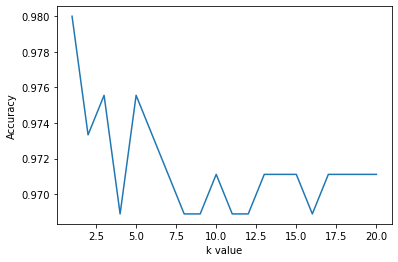

In [ ]:
k_range = range(1, 21)
accuracy = []
for k in k_range:
    m = KNeighborsClassifier(k)
    m.fit(x_train, y_train)
    y_test_pred = m.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
plt.plot(k_range, accuracy)
plt.xlabel('k value')
plt.ylabel('Accuracy')



#tal y como se aprecia para k=4 podríamos obtener una accuracy de 0.976 aproximadamente

In [ ]:
#probamos con k=4
# Create kNN model
model = KNeighborsClassifier(n_neighbors=4)

# Train the model using the training sets
model.fit(x_train, y_train) 
y_train_pred = model.predict(x_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))
y_test_pred = model.predict(x_test)
print("Accuracy in testing ", metrics.accuracy_score(y_test, y_test_pred))


Accuracy in training 0.9821826280623608
Accuracy in testing  0.9688888888888889


In [ ]:
#KFOLD VALIDATION
#Para k=5
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create a composite estimator made by a pipeline of preprocessing and the KNN model
model = Pipeline([
        ('scaler', StandardScaler()),
        ('kNN', KNeighborsClassifier())
])

# create a k-fold cross validation iterator of k=5 folds
cv = KFold(4, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x_digits, y_digits, cv=cv)
print(scores)

[0.97555556 0.97995546 0.9688196  0.97772829]


In [ ]:
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

Mean score: 0.976 (+/- 0.002)


### Algoritmo Árbol de decisión

 Dado un conjunto de datos se fabrican diagramas de construcciones lógicas, muy similares a los sistemas de predicción basados en reglas, que sirven para representar y categorizar una serie de condiciones que ocurren de forma sucesiva, para la resolución de un problema.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

from sklearn import tree

max_depth=3 #número de preguntas a los datos
random_state=1 

# Create decision tree model
model = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

# Train the model using the training sets
model.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
print("Prediction ", model.predict(x_train))
print("Expected ", y_train)
#Podemos ver un error de predicción en los últimos números 

Prediction  [4 7 4 ... 3 3 5]
Expected  [4 7 4 ... 1 5 5]


In [ ]:
# Print the 
print("Predicted probabilities", model.predict_proba(x_train[:10]))

Predicted probabilities [[0.01123596 0.10674157 0.         0.00842697 0.33707865 0.08707865
  0.33707865 0.00842697 0.07303371 0.03089888]
 [0.         0.04591837 0.0255102  0.03571429 0.10204082 0.01530612
  0.         0.67346939 0.04081633 0.06122449]
 [0.01123596 0.10674157 0.         0.00842697 0.33707865 0.08707865
  0.33707865 0.00842697 0.07303371 0.03089888]
 [0.         0.04591837 0.0255102  0.03571429 0.10204082 0.01530612
  0.         0.67346939 0.04081633 0.06122449]
 [0.01123596 0.10674157 0.         0.00842697 0.33707865 0.08707865
  0.33707865 0.00842697 0.07303371 0.03089888]
 [0.95862069 0.         0.         0.         0.02758621 0.00689655
  0.00689655 0.         0.         0.        ]
 [0.95862069 0.         0.         0.         0.02758621 0.00689655
  0.00689655 0.         0.         0.        ]
 [0.         0.15083799 0.23277467 0.23649907 0.0018622  0.07635009
  0.01303538 0.00931099 0.14897579 0.13035382]
 [0.         0.15083799 0.23277467 0.23649907 0.0018622 

In [ ]:
# Evaluate Accuracy in training

from sklearn import metrics
y_train_pred = model.predict(x_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))
#Accuracy muy mala

Accuracy in training 0.45879732739420936


In [ ]:
# Now we evaluate error in testing
y_test_pred = model.predict(x_test)
print("Accuracy in testing ", metrics.accuracy_score(y_test, y_test_pred))

Accuracy in testing  0.36


**Evaluación del algoritmo**

In [ ]:
#K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create a composite estimator made by a pipeline of preprocessing and the KNN model
model = Pipeline([
        ('scaler', StandardScaler()),
        ('DecisionTree', DecisionTreeClassifier())
])

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x_digits, y_digits, cv=cv)
print(scores)

[0.83888889 0.81111111 0.83888889 0.88333333 0.89444444 0.84444444
 0.87777778 0.87150838 0.8547486  0.82681564]


In [ ]:
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))
#Podemos ver que este modelo con estos parámetros de entrada da un resultado mejorable

Mean score: 0.854 (+/- 0.008)


**Mejora del algoritmo**

A la vista de los resultados tan pobres que nos aporta el árbol de decisión, vamos a intentar customizarlo para mejorar la predicción. 
Tal y como se ve en la caja de código anterior se obtiene una mean score en la precisión de 0.854

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# create a composite estimator made by a pipeline of preprocessing and the KNN model
model = Pipeline([
        ('scaler', StandardScaler()),
        ('ds', DecisionTreeClassifier())
])

# Fit the model
model.fit(x_train, y_train) 

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x_digits, y_digits, cv=cv)

from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

Mean score: 0.859 (+/- 0.004)


In [ ]:
#Pipelines
model.named_steps

{'ds': DecisionTreeClassifier(), 'scaler': StandardScaler()}

In [ ]:
model.steps

[('scaler', StandardScaler()), ('ds', DecisionTreeClassifier())]

In [ ]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'ds', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'ds__ccp_alpha', 'ds__class_weight', 'ds__criterion', 'ds__max_depth', 'ds__max_features', 'ds__max_leaf_nodes', 'ds__min_impurity_decrease', 'ds__min_samples_leaf', 'ds__min_samples_split', 'ds__min_weight_fraction_leaf', 'ds__random_state', 'ds__splitter'])

In [ ]:
model.set_params(ds__class_weight='balanced')

Pipeline(steps=[('scaler', StandardScaler()),
                ('ds', DecisionTreeClassifier(class_weight='balanced'))])

In [ ]:
model = Pipeline([
        ('scaler', StandardScaler()),
        ('ds', DecisionTreeClassifier(class_weight='balanced'))
])
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('ds', DecisionTreeClassifier(class_weight='balanced'))])

In [ ]:
# Fit the model
model.fit(x_train, y_train) 
# Using named_steps
my_decision_tree = model.named_steps['ds']
print(my_decision_tree.feature_importances_)

[0.         0.         0.0184348  0.00286825 0.02364504 0.04552484
 0.00164574 0.         0.         0.00872439 0.01728758 0.00308886
 0.01126655 0.01598772 0.00137457 0.         0.         0.00461815
 0.01233964 0.02629468 0.04658112 0.08232796 0.00084524 0.
 0.00150876 0.0039439  0.01976661 0.06266703 0.00511314 0.0473036
 0.00105319 0.         0.         0.05970697 0.01028098 0.00082305
 0.07396948 0.03415562 0.0120311  0.         0.         0.00229761
 0.11377921 0.06403012 0.0118482  0.00418259 0.0061059  0.
 0.         0.00368624 0.00431456 0.00776765 0.00550506 0.01890021
 0.02525985 0.         0.         0.         0.00806131 0.
 0.06233126 0.00395893 0.00279274 0.        ]


In [ ]:
#Using steps, we take the last step (-1) or the second step (1)
#name, my_desision_tree = model.steps[1]
name, my_desision_tree = model.steps[-1]
print(my_decision_tree.feature_importances_)

[0.         0.         0.0184348  0.00286825 0.02364504 0.04552484
 0.00164574 0.         0.         0.00872439 0.01728758 0.00308886
 0.01126655 0.01598772 0.00137457 0.         0.         0.00461815
 0.01233964 0.02629468 0.04658112 0.08232796 0.00084524 0.
 0.00150876 0.0039439  0.01976661 0.06266703 0.00511314 0.0473036
 0.00105319 0.         0.         0.05970697 0.01028098 0.00082305
 0.07396948 0.03415562 0.0120311  0.         0.         0.00229761
 0.11377921 0.06403012 0.0118482  0.00418259 0.0061059  0.
 0.         0.00368624 0.00431456 0.00776765 0.00550506 0.01890021
 0.02525985 0.         0.         0.         0.00806131 0.
 0.06233126 0.00395893 0.00279274 0.        ]


In [ ]:
#EMPEZAMOS CON EL TUNING
model.get_params()


{'ds': DecisionTreeClassifier(class_weight='balanced'),
 'ds__ccp_alpha': 0.0,
 'ds__class_weight': 'balanced',
 'ds__criterion': 'gini',
 'ds__max_depth': None,
 'ds__max_features': None,
 'ds__max_leaf_nodes': None,
 'ds__min_impurity_decrease': 0.0,
 'ds__min_samples_leaf': 1,
 'ds__min_samples_split': 2,
 'ds__min_weight_fraction_leaf': 0.0,
 'ds__random_state': None,
 'ds__splitter': 'best',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()),
  ('ds', DecisionTreeClassifier(class_weight='balanced'))],
 'verbose': False}

**Grid search for Parameter optimization**

The sklearn provides an object that, given data, computes the score during the fit of an estimator on a parameter grid and chooses the parameters to maximize the cross-validation score. 

In [ ]:


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

param_grid = {'max_depth': np.arange(3, 10)} 

gs = GridSearchCV(DecisionTreeClassifier(), param_grid)

gs.fit(x_train, y_train)

# summarize the results of the grid search
print("Best score: ", gs.best_score_)
print("Best params: ", gs.best_params_)

#Obtenemos un max_depth óptima de 9


Best score:  0.8284648216990224
Best params:  {'max_depth': 9}


In [ ]:
# We print the score for each value of max_depth
for i, max_depth in enumerate(gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (gs.cv_results_['mean_test_score'][i],
                                        gs.cv_results_['std_test_score'][i] * 2,
                                        max_depth))

0.444 (+/-0.054) for {'max_depth': 3}
0.592 (+/-0.094) for {'max_depth': 4}
0.673 (+/-0.043) for {'max_depth': 5}
0.768 (+/-0.038) for {'max_depth': 6}
0.796 (+/-0.067) for {'max_depth': 7}
0.821 (+/-0.043) for {'max_depth': 8}
0.828 (+/-0.056) for {'max_depth': 9}


In [ ]:
# create a composite estimator made by a pipeline of preprocessing and the KNN model
model = Pipeline([
        ('scaler', StandardScaler()),
        ('ds', DecisionTreeClassifier(max_depth=9))
])

# Fit the model
model.fit(x_train, y_train) 

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x_digits, y_digits, cv=cv)
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

#No veo que se produzca una mejora 

Mean score: 0.854 (+/- 0.007)


In [ ]:
# Set the parameters by cross-validation

from sklearn.metrics import classification_report, recall_score, precision_score, make_scorer

# set of parameters to test
tuned_parameters = [{'max_depth': np.arange(3, 10),
#                     'max_weights': [1, 10, 100, 1000]},
                     'criterion': ['gini', 'entropy'], 
                     'splitter': ['best', 'random'],
                    # 'min_samples_leaf': [2, 5, 10],
                     'class_weight':['balanced', None],
                     'max_leaf_nodes': [None, 5, 10, 20]
                    }]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    if score == 'precision':
        scorer = make_scorer(precision_score, average='weighted', zero_division=0)
    elif score == 'recall':
        scorer = make_scorer(recall_score, average='weighted', zero_division=0)
    
    # cv = the fold of the cross-validation cv, defaulted to 5
    gs = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=10, scoring=scorer)
    gs.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(gs.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']

    for mean_score, std_score, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean_score, std_score * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, gs.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': None, 'splitter': 'best'}

Grid scores on development set:

0.416 (+/-0.042) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': None, 'splitter': 'best'}
0.462 (+/-0.137) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': None, 'splitter': 'random'}
0.288 (+/-0.032) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'splitter': 'best'}
0.280 (+/-0.038) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'splitter': 'random'}
0.416 (+/-0.042) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 10, 'splitter': 'best'}
0.431 (+/-0.119) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 10, 'splitte

In [ ]:
# create a composite estimator made by a pipeline of preprocessing and the KNN model
#max_depth de 9
model = Pipeline([
        ('scaler', StandardScaler()),
        ('ds', DecisionTreeClassifier(max_leaf_nodes=20, criterion='gini', 
                                      splitter='random', class_weight='balanced', max_depth=9))
])

# Fit the model
model.fit(x_train, y_train) 

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x_digits, y_digits, cv=cv)
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

Mean score: 0.708 (+/- 0.015)


###Algoritmo SVM

Dado un conjunto de puntos, subconjunto de un conjunto mayor (espacio), en el que cada uno de ellos pertenece a una de dos posibles categorías, un algoritmo basado en SVM construye un modelo capaz de predecir si un punto nuevo (cuya categoría desconocemos) pertenece a una categoría o a la otra.

In [ ]:
import matplotlib.pyplot as plt

from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100)

#en este apartado se muestra una idea conceptual del funcionamiento del SVM

In [ ]:
print(len(digits.data)) #recordamos la longitud del dataset

#Entrenamos con todo el array menos con los últimos 10 valores
x,y = digits.data[:-10], digits.target[:-10]


clf.fit(x,y)

1797


SVC(C=100, gamma=0.001)

In [ ]:
x.shape #vemos que esto es 1797-10

(1787, 64)

Prediction: [9]


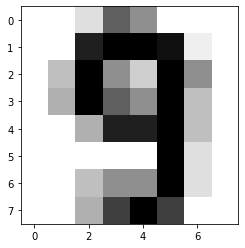

In [ ]:
print('Prediction:', clf.predict(digits.data[-2:-1]))
#predecimos con la posición penúltima


plt.imshow(digits.images[-2], cmap=plt.cm.gray_r, interpolation='nearest')
#mostramos la imagen del digito de la posición penúltima
plt.show()

#parece que sí es un 9


Prediction: [4]


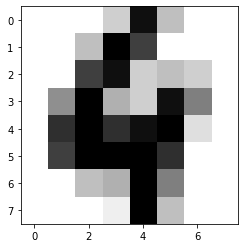

In [ ]:
print('Prediction:', clf.predict(digits.data[-6:-5]))
#predecimos con la posición 6 empezando por el final
#recordamos que los últimos 10 números no los hemos usado para entrenar entonces
#tiene sentido tratar de predecirlos


plt.imshow(digits.images[-6], cmap=plt.cm.gray_r, interpolation='nearest')
#mostramos la imagen del digito de la posición penúltima
plt.show()

#parece que sí es un 4

**Creamos el modelo SVM**

El "truco" del kernel consiste en inventar una dimensión nueva en la que podamos encontrar un hiperplano para separar las clases.
Vamos a hacer una comparación del modelo usando kernel lineal y kernel RBF.

rbf kernel: https://en.wikipedia.org/wiki/Radial_basis_function_kernel

linear kernel: https://www.geeksforgeeks.org/creating-linear-kernel-svm-in-python/ 


In [ ]:
#Recordamos el tamaño del x train y el x test realizado en el apartado de preprocesado

print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)


x_train.shape: (1347, 64)
x_test.shape: (450, 64)


In [ ]:
#utilizamos linear kernel
model_linear =svm.SVC(kernel='linear', degree=3, gamma='scale')
model_linear.fit(x_train, y_train)

y_pred = model_linear.predict(x_test)

In [ ]:
#utilizamos RBF kernel
model_RBF =svm.SVC(kernel='rbf', degree=3, gamma='scale')
model_RBF.fit(x_train, y_train)

y_pred = model_RBF.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
predictions = model_linear.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.93      1.00      0.96        54
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        46
           4       0.97      0.97      0.97        35
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        51
           7       1.00      1.00      1.00        35
           8       0.98      0.90      0.94        58
           9       0.96      0.98      0.97        44

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



**Evaluación del modelo**


In [ ]:
print('Accuracy of the model (linear):', model_linear.score(x_test, y_test))
print('Accuracy of the model (RBF):', model_RBF.score(x_test, y_test))


Accuracy of the model (linear): 0.9755555555555555
Accuracy of the model (RBF): 0.9866666666666667


In [ ]:
from sklearn.metrics import classification_report
predictions = model_linear.predict(x_test)
print("LINEAR KERNEL:\n",classification_report(y_test, predictions))
print("\n")
predictions = model_RBF.predict(x_test)
print("RBF KERNEL: \n", classification_report(y_test, predictions))

#RBF da unos resultados ligeramente mejores

LINEAR KERNEL:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.93      1.00      0.96        54
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        46
           4       0.97      0.97      0.97        35
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        51
           7       1.00      1.00      1.00        35
           8       0.98      0.90      0.94        58
           9       0.96      0.98      0.97        44

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



RBF KERNEL: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      1.00      0.99        54
           2       1.00      0.98      0.99   

##Persistencia

Vamos a probar como guardar el modelo combinado entre el StandardScaler y el KNeighborsClassifier.

Se puede usar pickle, diccionario que puede ser usado como un archivo o como un string, o también se puede usar joblib. 

In [ ]:
import pickle
s = pickle.dumps(model)
model2 = pickle.loads(s)
model2.predict(x_digits[0:1])

array([4])

In [ ]:
# save model
import joblib
joblib.dump(model, 'filename.pkl') 

#load model
model2 = joblib.load('filename.pkl') 

##Conclusiones

Esta práctica ha servido para tener una visión panóramica de los pasos que se deben seguir para afrontar un problema de clasificación: Análisis del dataset, preprocesado y normalización de los datos, definición de los sets de entrenamiento y testeo, entrenamiento del modelo, valoración de su rendimiento y optimización de sus parámetros de entrada para obtener una mejora en la predicción. 

Se partía de un datasets de dígitos definidos por una matriz de 8x8 píxeles, el objetivo ha sido que el modelo fuera capaz de clasificar cada conjunto de píxeles (fila) en un número de 0 al 9. El modelo que mejor resultado ha dado para ello entre los que han sido puestos a prueba ha sido el SVM. 



